<a href="https://colab.research.google.com/github/gabemdelc/Relativistic_dynamics/blob/main/relative_dynamic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1kG-a4svQdglMPkYWaMUwYqx3zJklkbvD
To: /content/SCPUnion2_mu_vs_z.tx
100%|██████████| 23.6k/23.6k [00:00<00:00, 12.9MB/s]


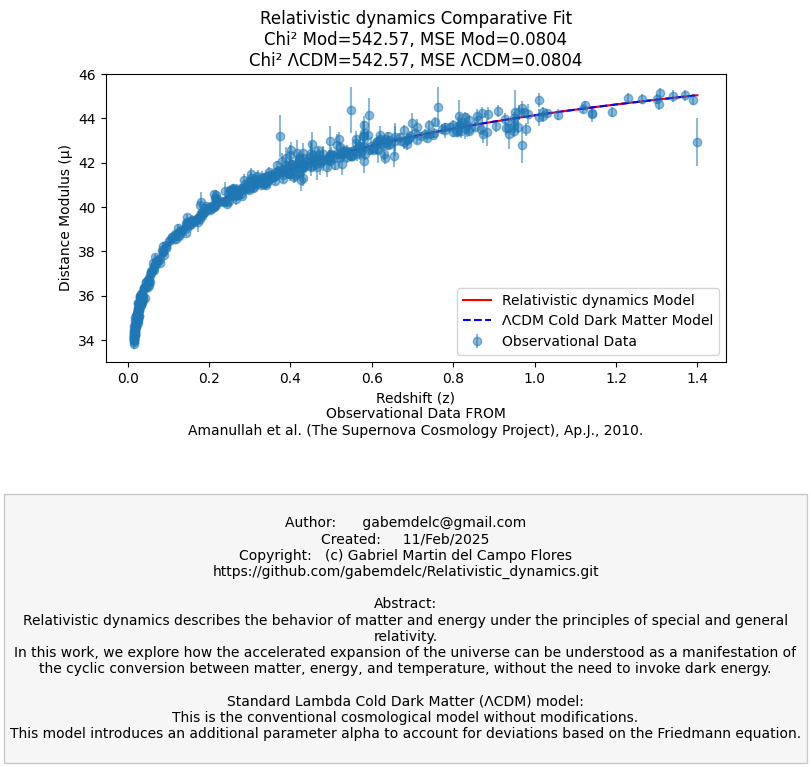

Fit Metrics:
Modified Model: Chi² = 542.57, MSE = 0.0804
ΛCDM Model: Chi² = 542.57, MSE = 0.0804


In [10]:
# coding=utf-8
###################################################################################
##
# Author:      gabemdelc@gmail.com
#
# Created:     11/Feb/2025
# Copyright:   (c) Gabriel Martin del Campo Flores
# Licence:     MIT License
# -------------------------------------------------------------------------------
# Abstract
# Relativistic dynamics describes the behavior of matter and energy under the principles of special and general relativity.
# In this work, we explore how the accelerated expansion of the universe can be understood as a manifestation of
# the cyclic conversion between matter, energy, and temperature, without the need to invoke dark energy.
#
# Standard Lambda Cold Dark Matter (ΛCDM) model
# This is the conventional cosmological model without modifications
# And use friedmann_modified, Define the modified model based on the Friedmann equation
# This model introduces an additional parameter alpha to account for deviations

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import gdown

# Load observational data from SCPUnion2 dataset
filename = "data/SCPUnion2_mu_vs_z.txt"  # Please cite "Amanullah et al. (The Supernova Cosmology Project), Ap.J., 2010."
filename = "/content/drive/MyDrive/Relativistic_dynamics/data/SCPUnion2_mu_vs_z.txt"
file_id = "1kG-a4svQdglMPkYWaMUwYqx3zJklkbvD"  # Drive ID sharing
output = "SCPUnion2_mu_vs_z.tx"
filename = gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)
# Downloaded from: https://www.supernova.lbl.gov/Union/figures/SCPUnion2_mu_vs_z.txt
data = np.genfromtxt(filename, comments="#", usecols=(1, 2, 3), dtype=float)

z_obs = data[:, 0]  # Redshift
mu_obs = data[:, 1]  # Distance modulus
mu_err = data[:, 2]  # Distance modulus uncertainty

# Define the modified model based on the Friedmann equation
# This model introduces an additional parameter alpha to account for deviations

def friedmann_relativistic_dynamics(z, H0, Omega_m, Omega_lambda, alpha):
    Omega_k = 1.0 - Omega_m - Omega_lambda  # Spatial curvature component
    c = 299792.458  # Speed of light in km/s

    def E(z):
        return np.sqrt(Omega_m * (1 + z) ** 3 + Omega_lambda * (1 + alpha * z) + Omega_k * (1 + z) ** 2)

    integral = np.array([np.trapz(1 / E(np.linspace(0, zi, 1000)), np.linspace(0, zi, 1000)) for zi in z])
    d_L = (c / H0) * (1 + z) * integral  # Luminosity distance in Mpc
    mu = 5 * np.log10(d_L) + 25  # Distance modulus
    return mu

# Standard Lambda Cold Dark Matter (ΛCDM) model
# This is the conventional cosmological model without modifications

def friedmann_LCDM(z, H0, Omega_m, Omega_lambda):
    Omega_k = 1.0 - Omega_m - Omega_lambda  # Spatial curvature component
    c = 299792.458  # Speed of light in km/s

    def E(z):
        return np.sqrt(Omega_m * (1 + z) ** 3 + Omega_lambda + Omega_k * (1 + z) ** 2)

    integral = np.array([np.trapz(1 / E(np.linspace(0, zi, 1000)), np.linspace(0, zi, 1000)) for zi in z])
    d_L = (c / H0) * (1 + z) * integral  # Luminosity distance in Mpc
    mu = 5 * np.log10(d_L) + 25  # Distance modulus
    return mu

# Curve fitting to find the best-fit parameters for both models
popt_frd, _ = curve_fit(friedmann_relativistic_dynamics, z_obs, mu_obs, sigma=mu_err,
                        p0=[70, 0.3, 0.7, 0.1], bounds=([60, 0.2, 0.6, -1], [80, 0.4, 0.8, 1]))

popt_LCDM, _ = curve_fit(friedmann_LCDM, z_obs, mu_obs, sigma=mu_err,
                         p0=[70, 0.3, 0.7], bounds=([60, 0.2, 0.6], [80, 0.4, 0.8]))

# Compute fit metrics (Chi-square and Mean Squared Error)
mu_pred_mod = friedmann_relativistic_dynamics(z_obs, *popt_frd)
mu_pred_LCDM = friedmann_LCDM(z_obs, *popt_LCDM)

chi2_mod = np.sum(((mu_obs - mu_pred_mod) / mu_err) ** 2)
chi2_LCDM = np.sum(((mu_obs - mu_pred_LCDM) / mu_err) ** 2)

mse_mod = np.mean((mu_obs - mu_pred_mod) ** 2)
mse_LCDM = np.mean((mu_obs - mu_pred_LCDM) ** 2)


# Crear la gráfica
plt.figure(figsize=(8, 6))  # Asegura un tamaño adecuado de la figura

plt.errorbar(z_obs, mu_obs, yerr=mu_err, fmt='o', label='Observational Data', alpha=0.5)
plt.plot(z_fit, mu_fit_mod, label='Relativistic dynamics Model', color='red')
plt.plot(z_fit, mu_fit_LCDM, label='ΛCDM Cold Dark Matter Model', color='blue', linestyle="--")

plt.xlabel(f'Redshift (z)\nObservational Data FROM\nAmanullah et al. (The Supernova Cosmology Project), Ap.J., 2010.')
plt.ylabel('Distance Modulus (μ)')
plt.legend()
plt.title(
    f'Relativistic dynamics Comparative Fit\nChi² Mod={chi2_mod:.2f}, MSE Mod={mse_mod:.4f}\nChi² ΛCDM={chi2_LCDM:.2f}, MSE ΛCDM={mse_LCDM:.4f}')

# 📌 Ajustar el espacio para que el texto no se encime con la gráfica
plt.subplots_adjust(bottom=0.4)  # Aumenta el espacio debajo de la gráfica

# 📌 Agregar el texto explicativo debajo de la gráfica
text = """
Author:      gabemdelc@gmail.com
Created:     11/Feb/2025
Copyright:   (c) Gabriel Martin del Campo Flores
https://github.com/gabemdelc/Relativistic_dynamics.git

Abstract:
Relativistic dynamics describes the behavior of matter and energy under the principles of special and general relativity.
In this work, we explore how the accelerated expansion of the universe can be understood as a manifestation of
the cyclic conversion between matter, energy, and temperature, without the need to invoke dark energy.

Standard Lambda Cold Dark Matter (ΛCDM) model:
This is the conventional cosmological model without modifications.
This model introduces an additional parameter alpha to account for deviations based on the Friedmann equation.
"""

# 📌 Posicionar el texto debajo de la gráfica y alinearlo correctamente
plt.figtext(0.5, -0.25, text, wrap=True, horizontalalignment='center', fontsize=10, bbox=dict(facecolor='lightgray', alpha=0.2))

plt.show()



# Print fit metrics
print("Fit Metrics:")
print(f"Modified Model: Chi² = {chi2_mod:.2f}, MSE = {mse_mod:.4f}")
print(f"ΛCDM Model: Chi² = {chi2_LCDM:.2f}, MSE = {mse_LCDM:.4f}")